In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
plt.style.use('ggplot')
%matplotlib inline

In [5]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [13]:
# EDA Part

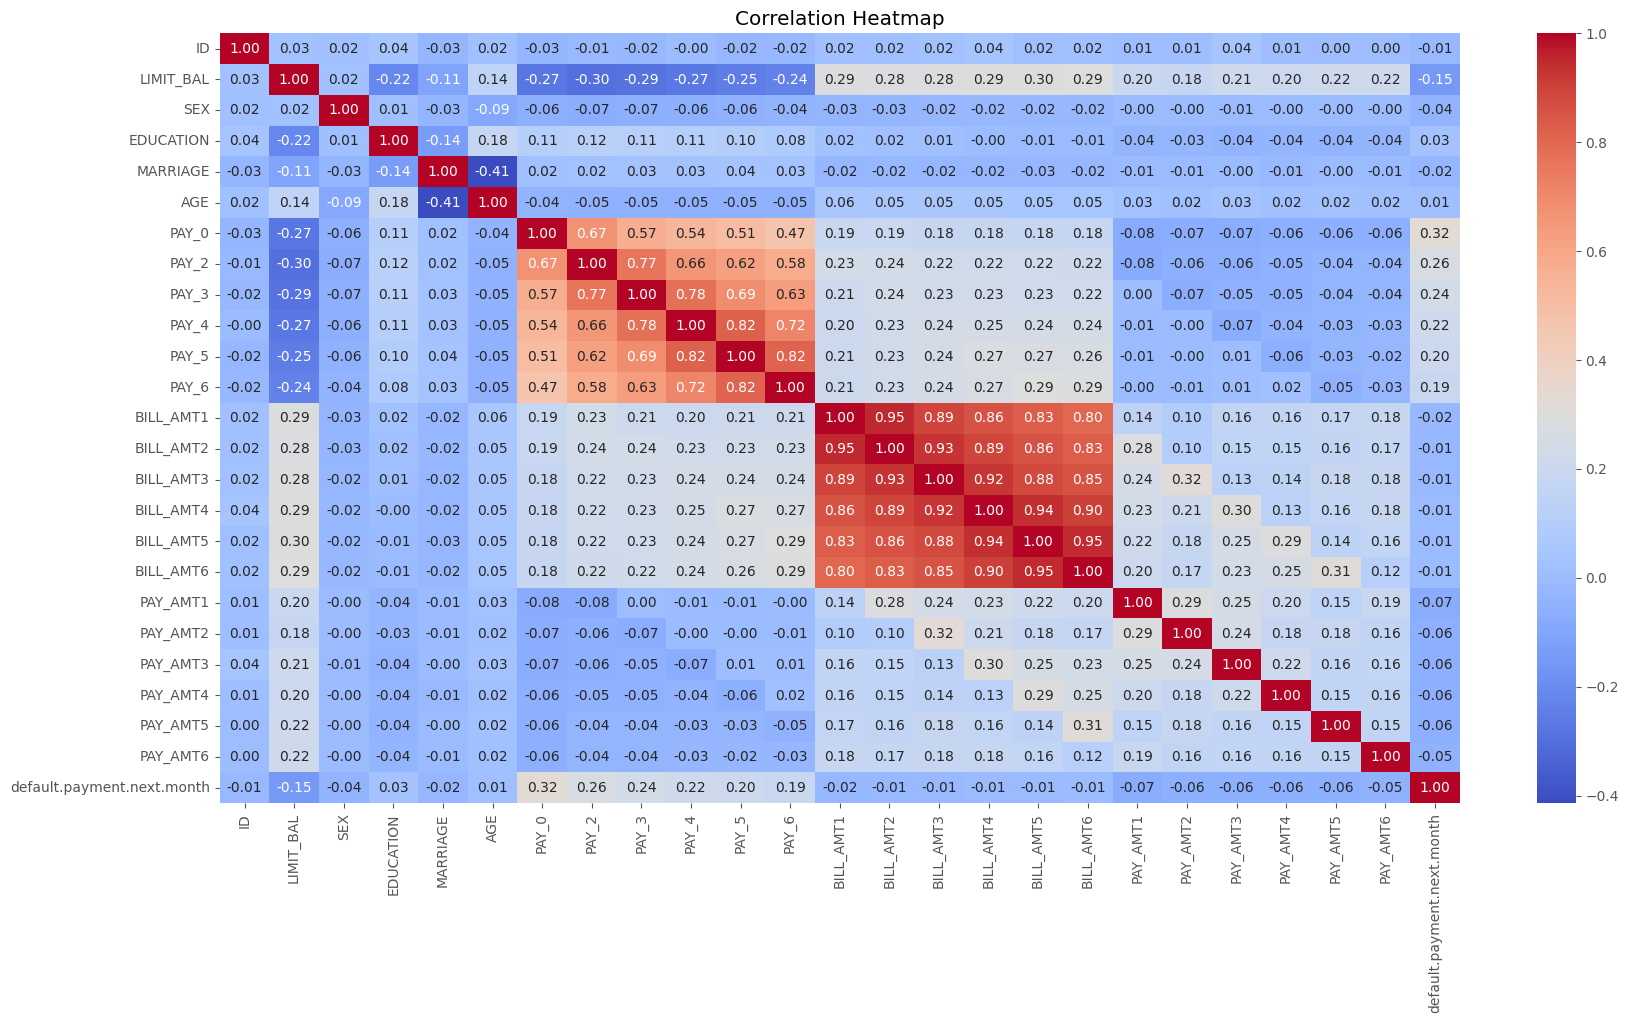

In [17]:
#Draw Heatmap
correlation_matrix = df.corr()
plt.figure(figsize = (20,10 ))
sns.heatmap(correlation_matrix, annot=True,  fmt= '.2f', cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

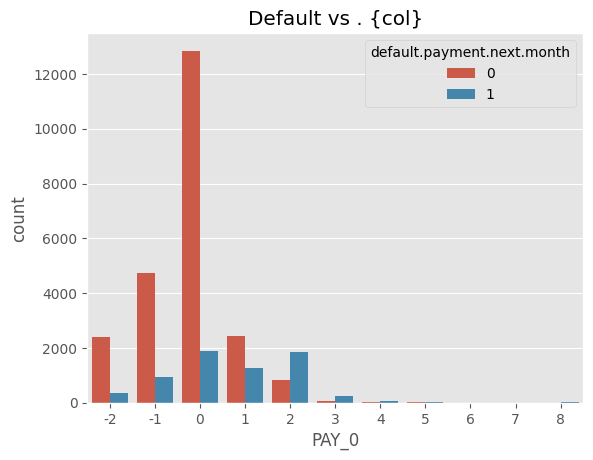

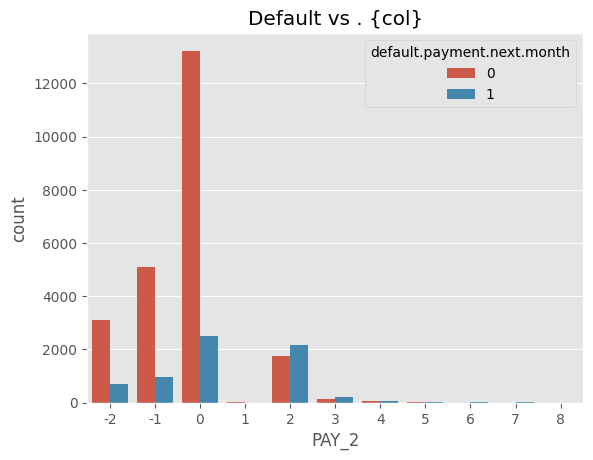

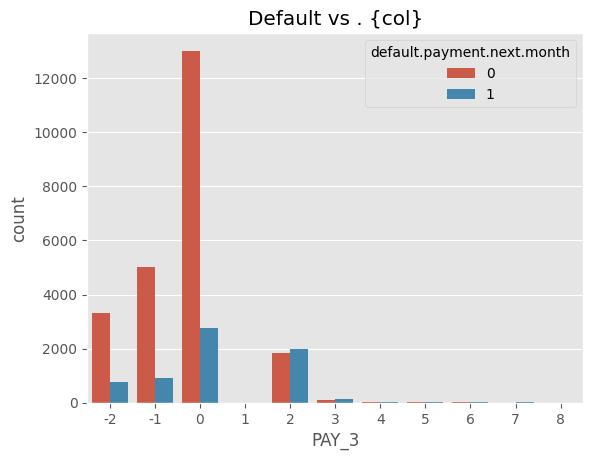

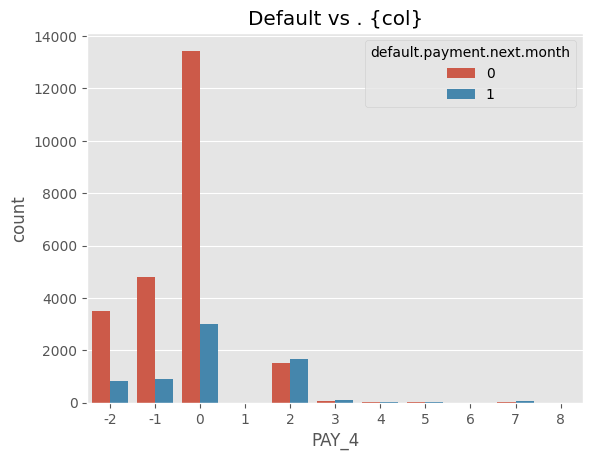

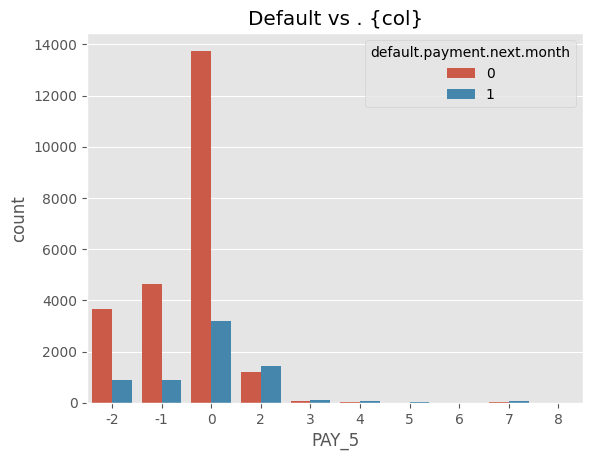

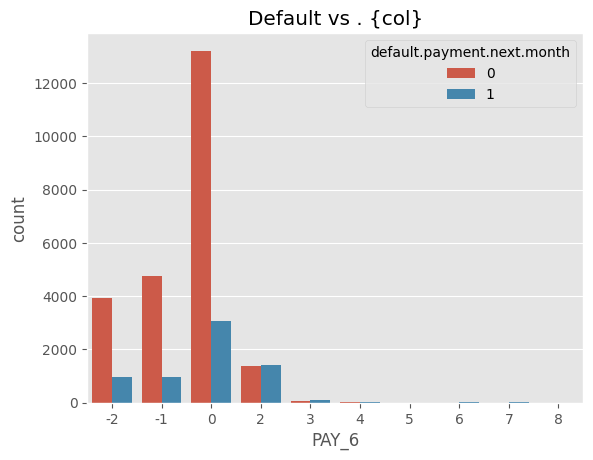

In [19]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns :
    sns.countplot(x=col, hue='default.payment.next.month', data=df)
    plt.title('Default vs . {col}')
    plt.show()

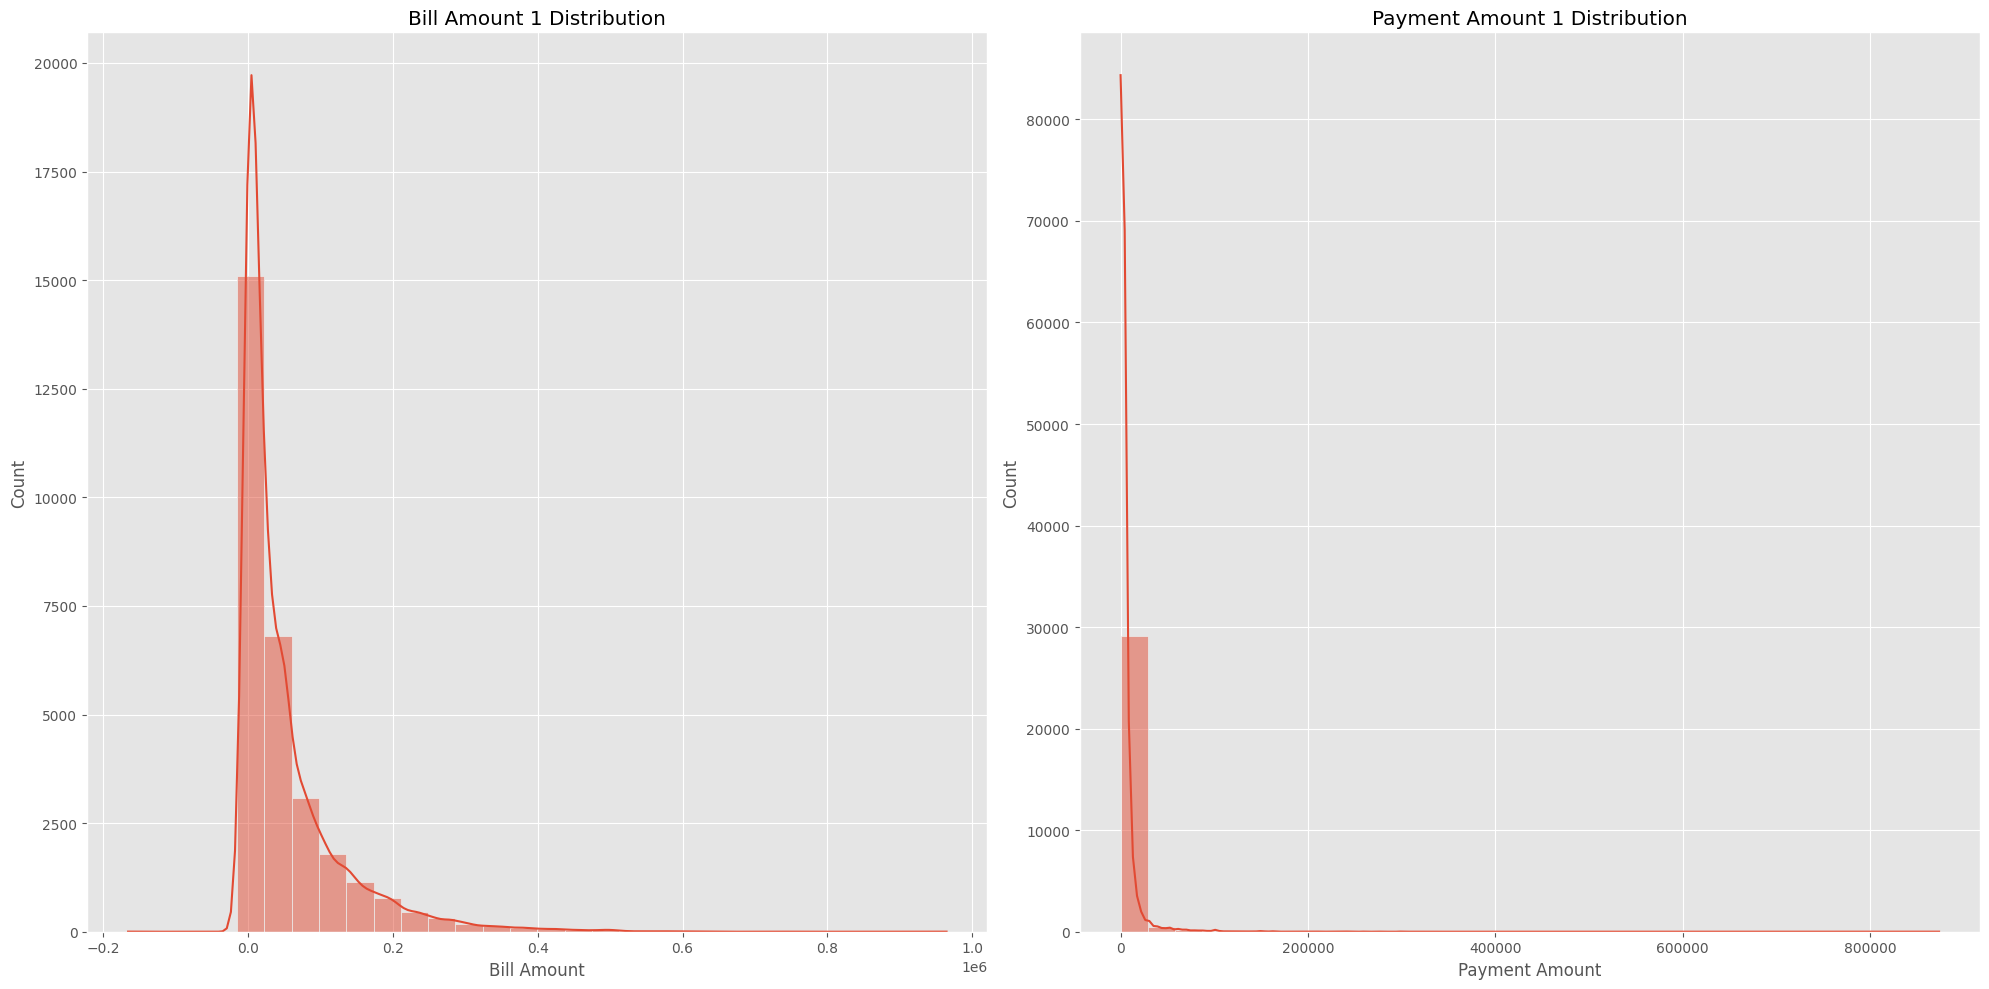

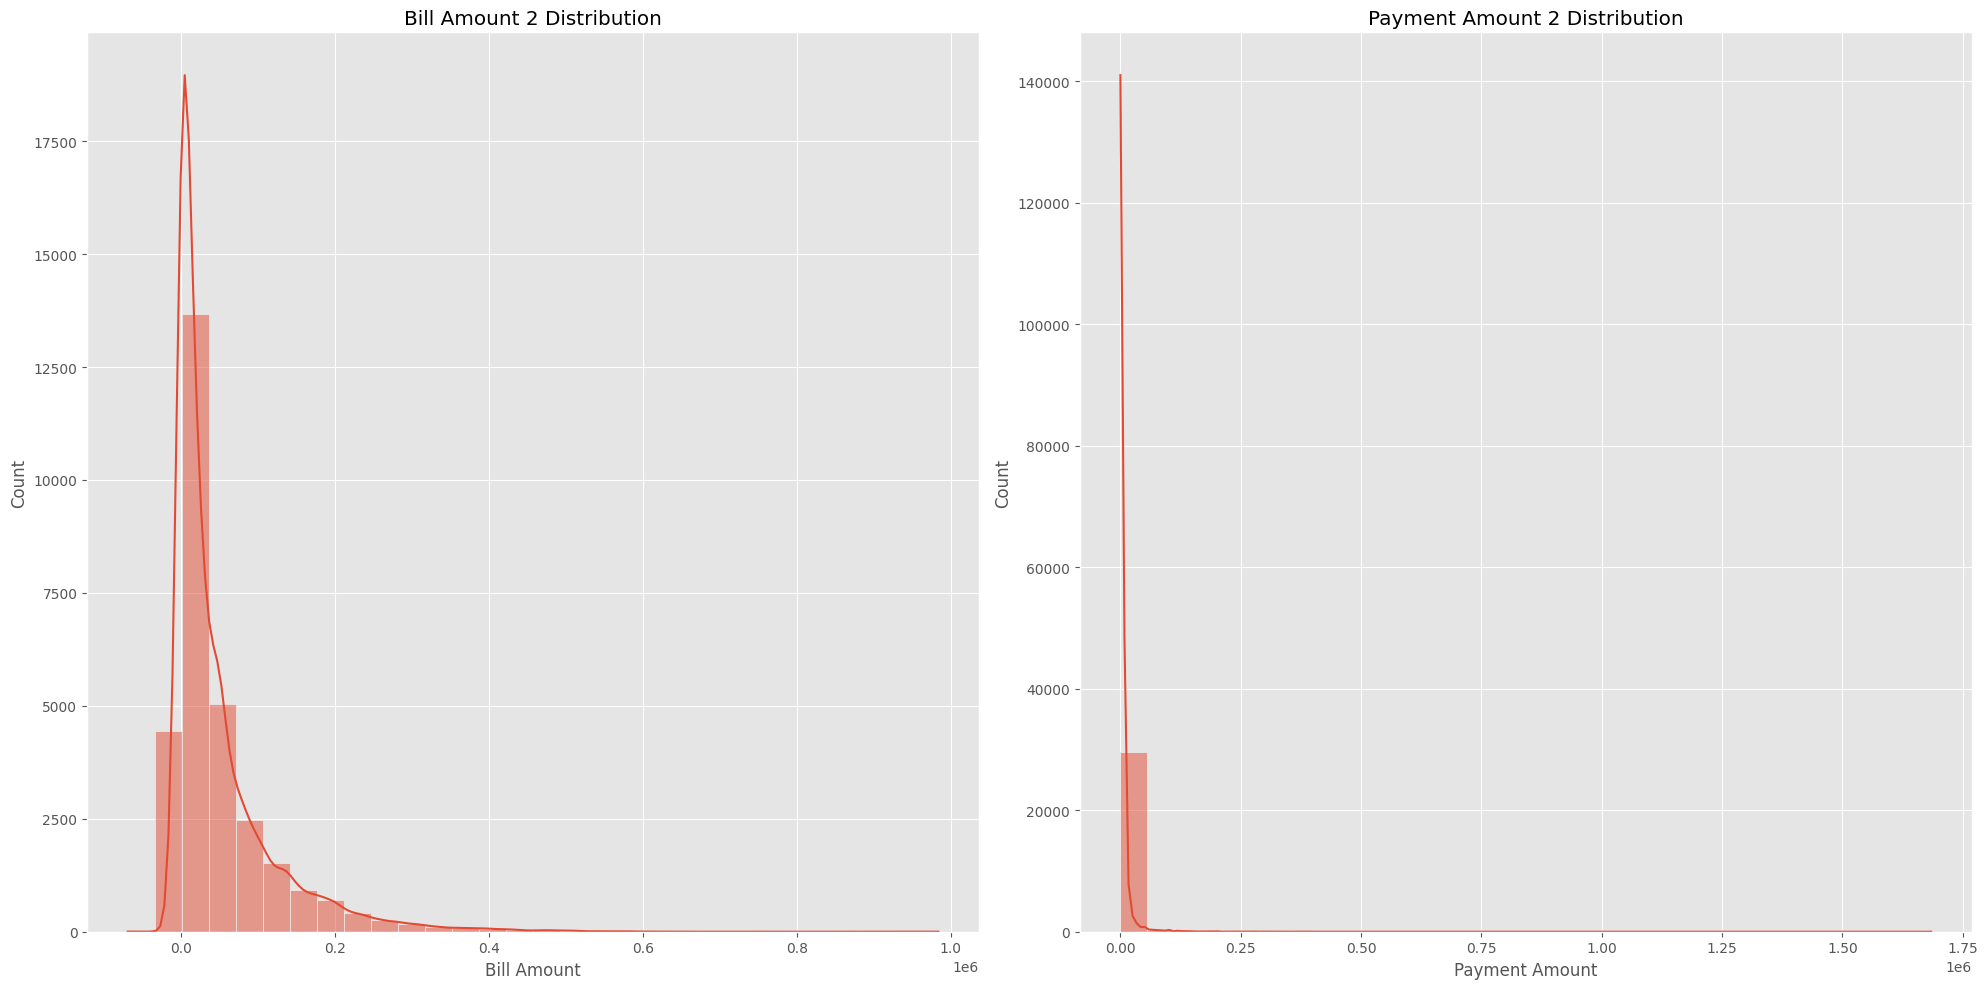

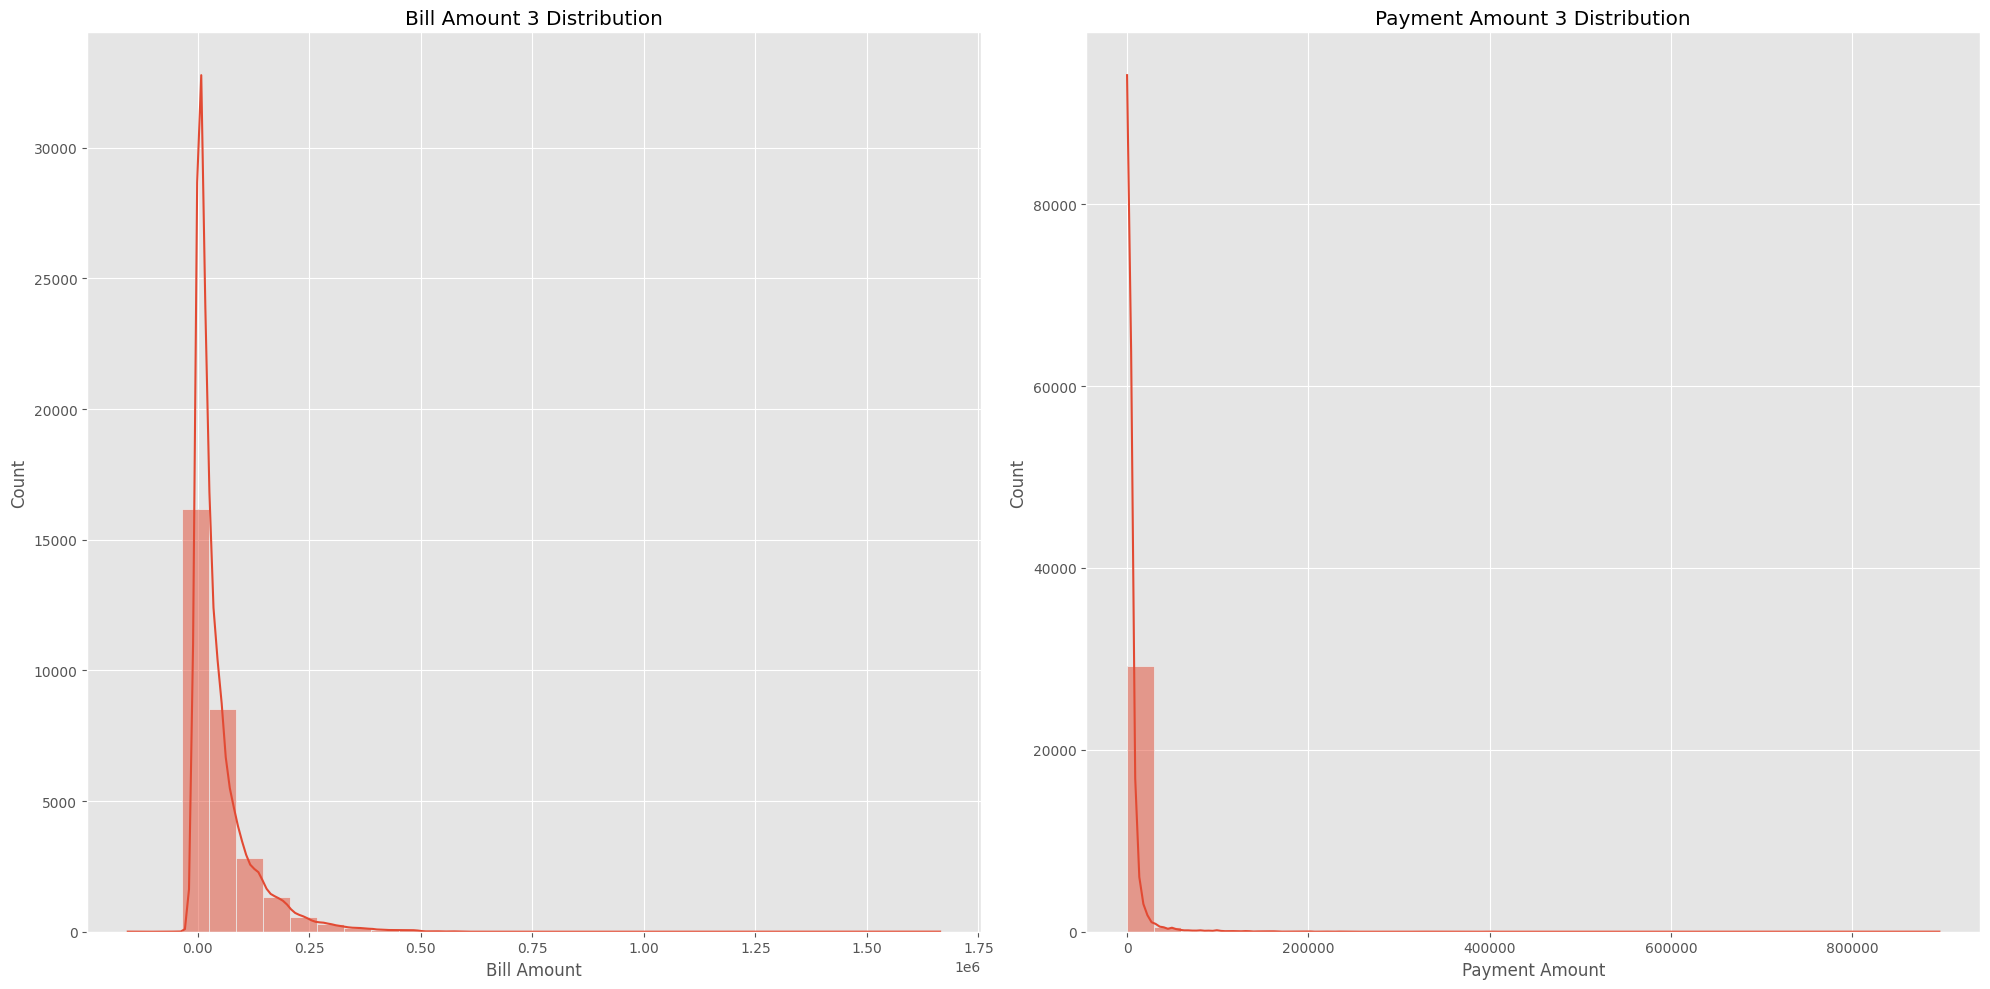

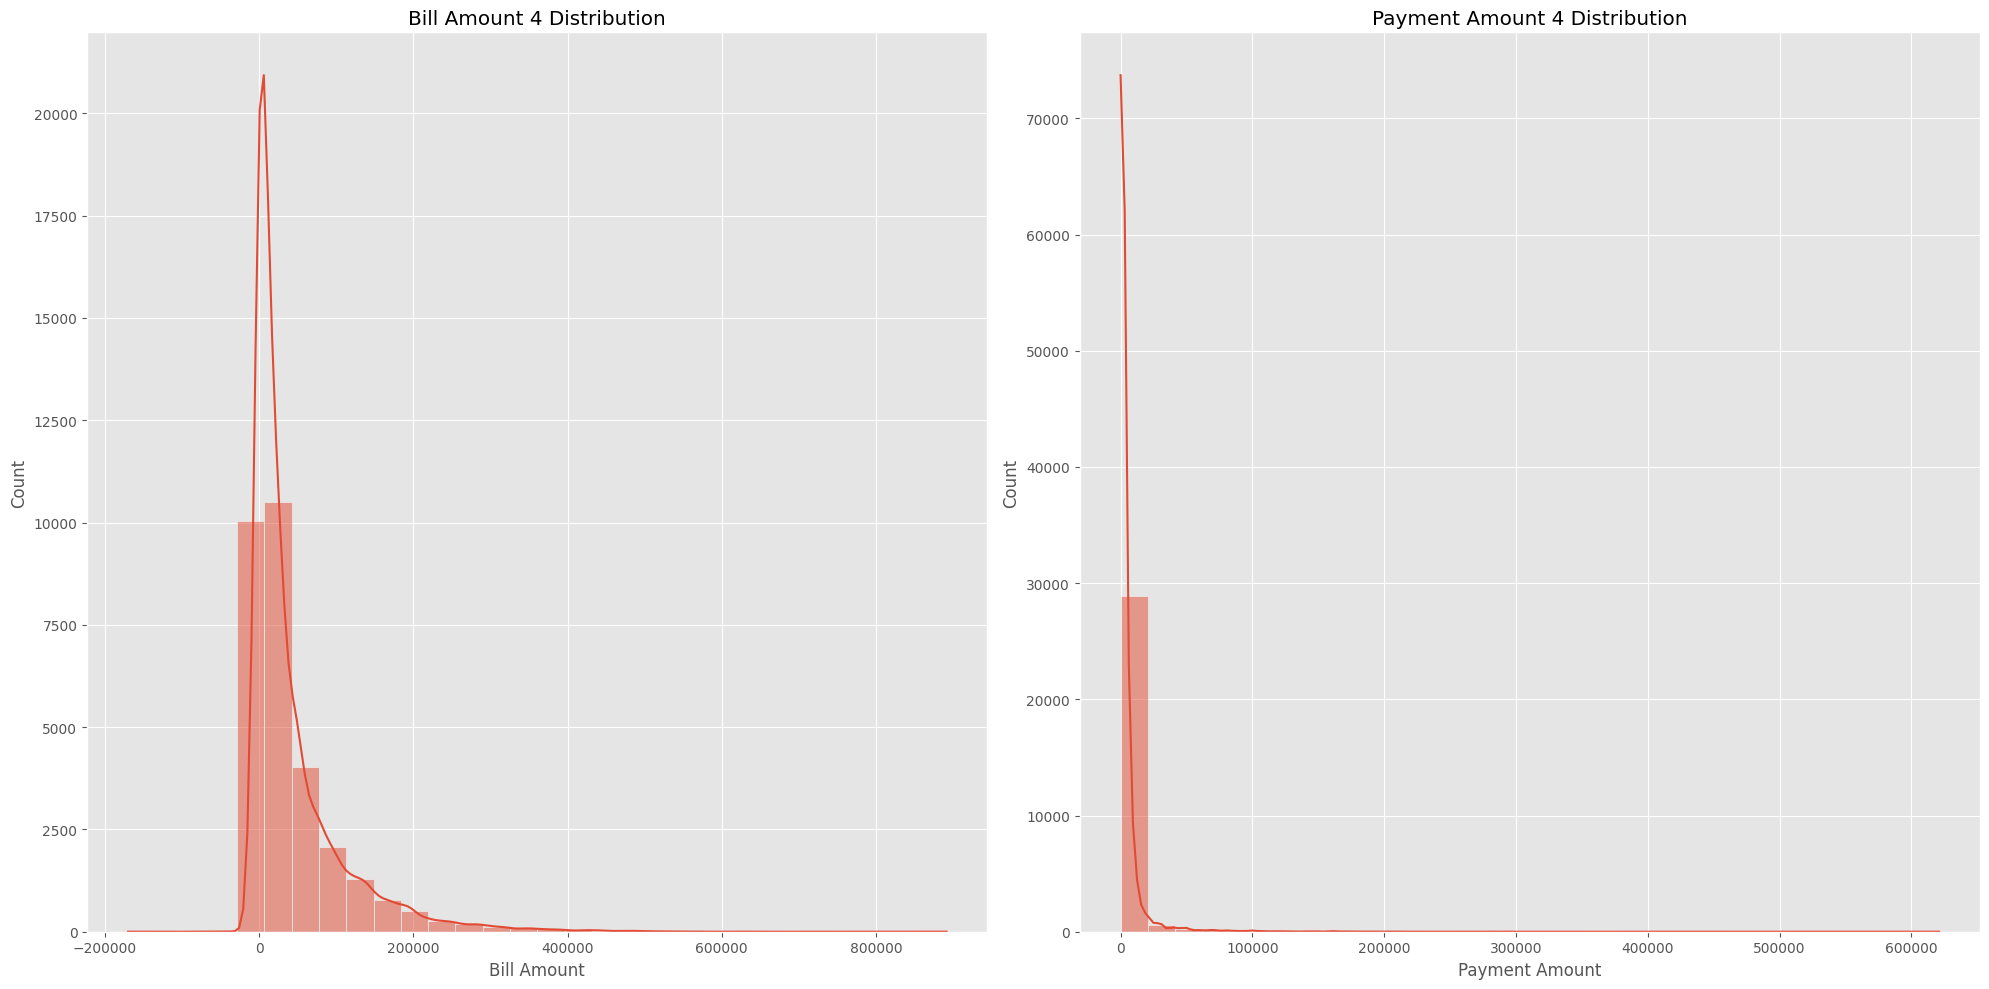

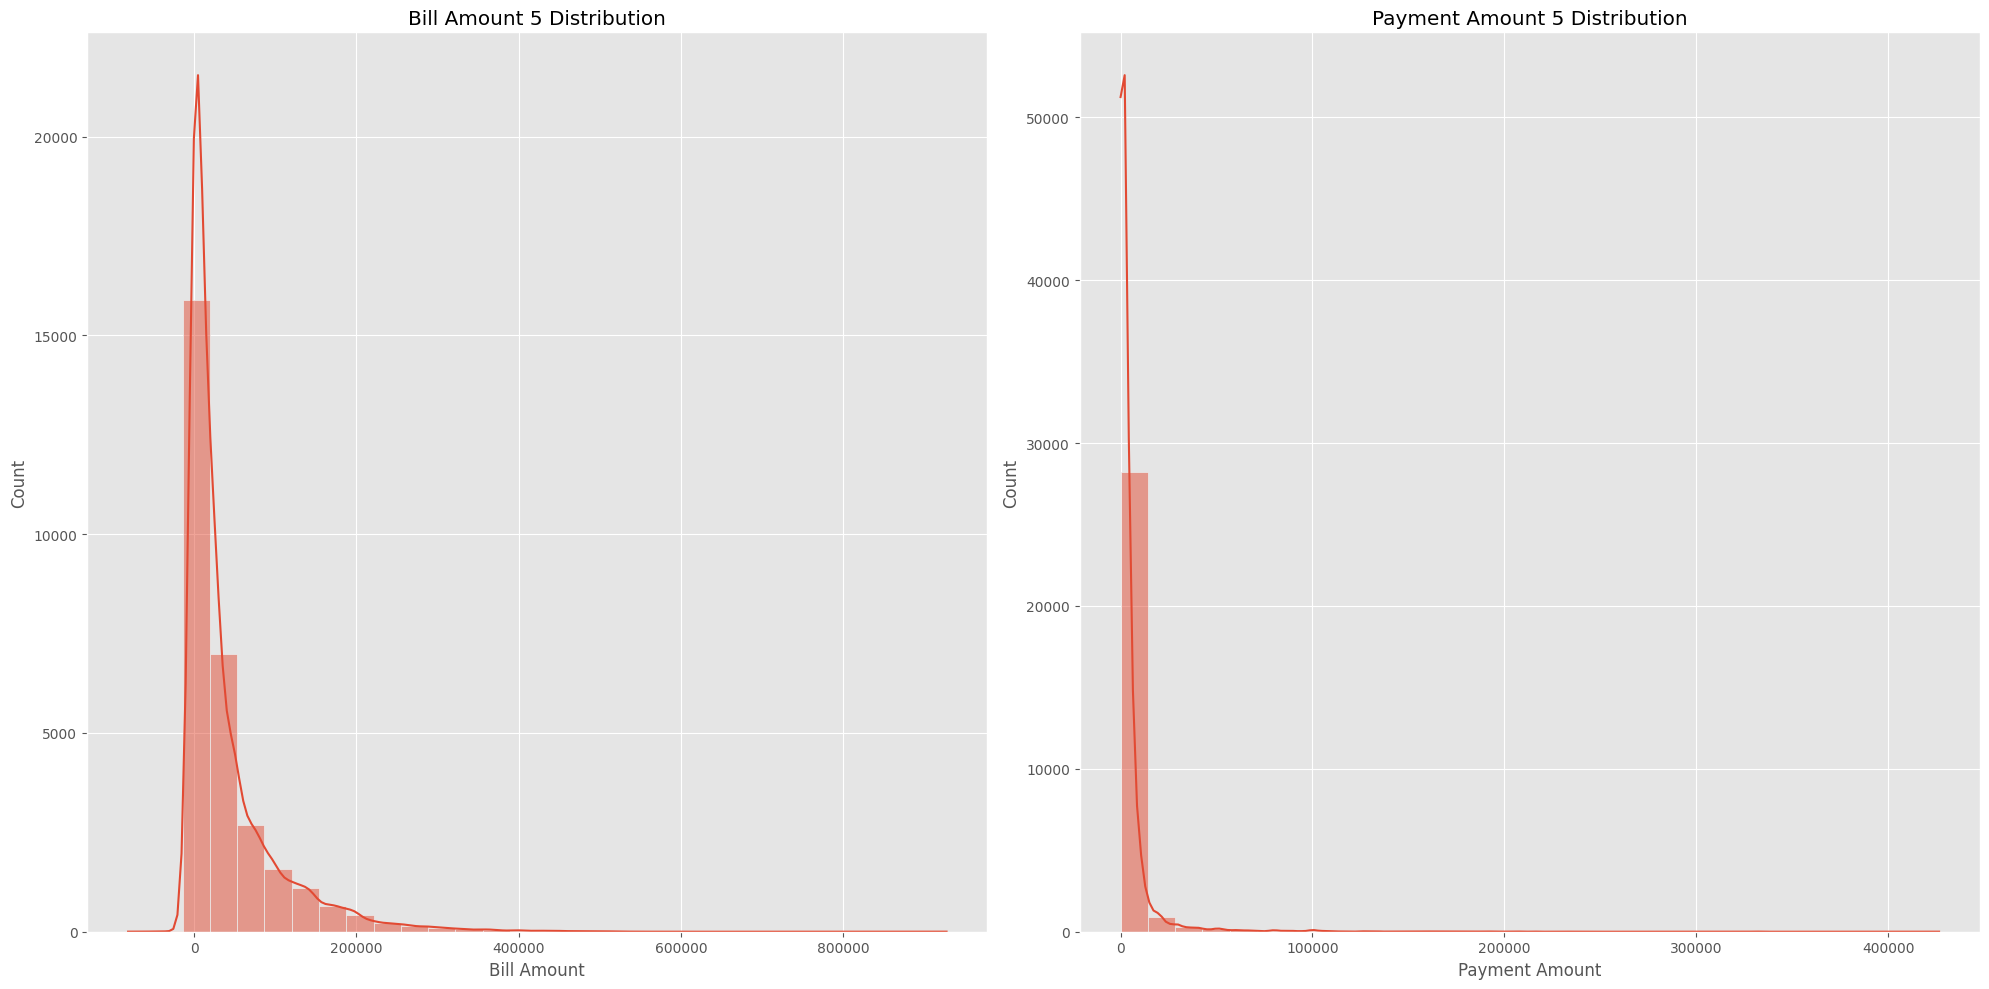

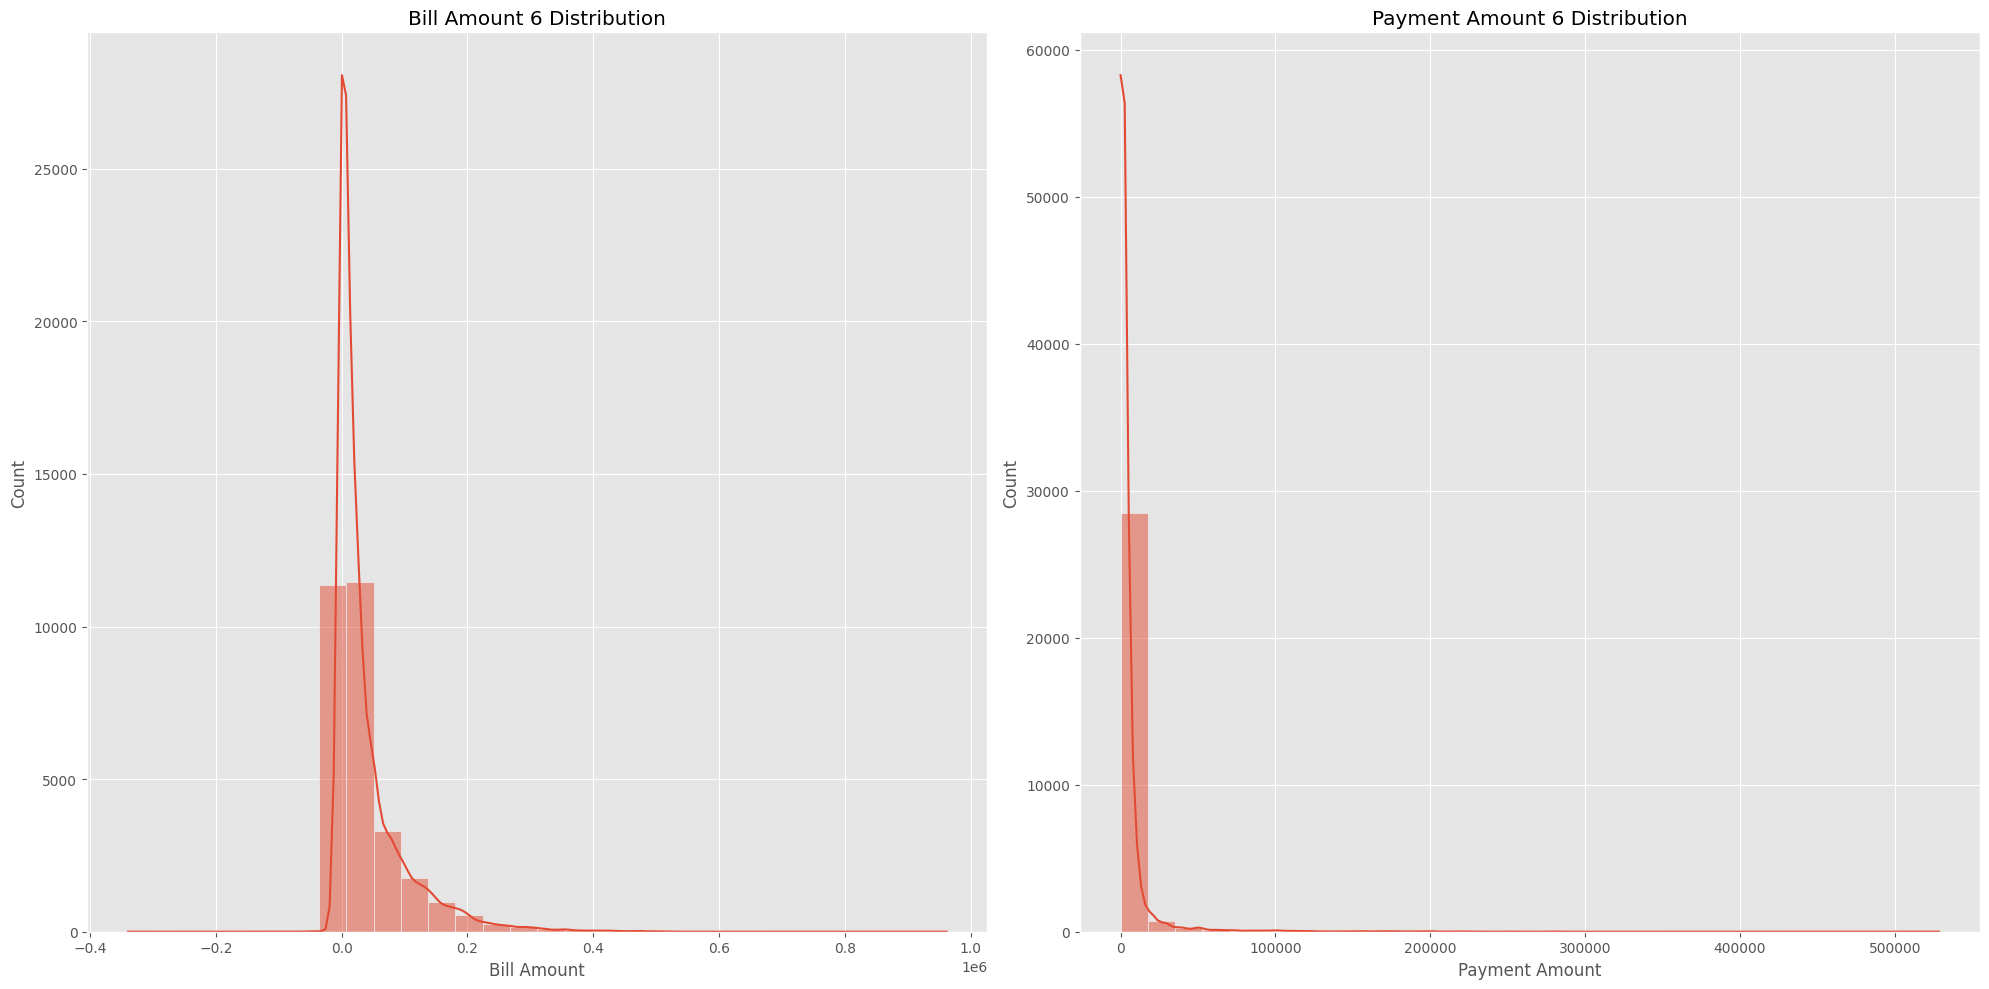

In [24]:
for i in range(1, 7):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'BILL_AMT{i}'], bins = 30, kde = True)
    plt.title(f'Bill Amount {i} Distribution')
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'PAY_AMT{i}'], bins = 30, kde = True)
    plt.title(f'Payment Amount {i} Distribution')
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

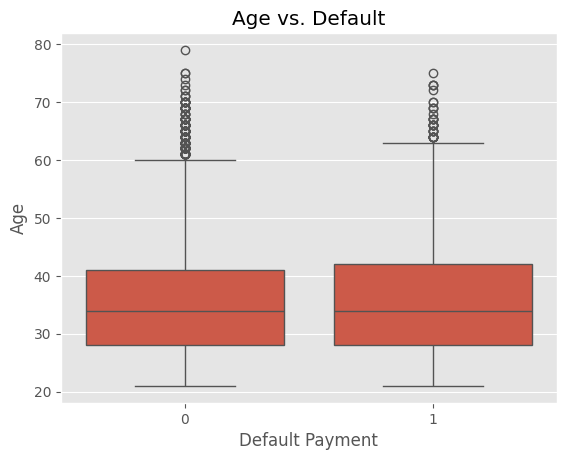

In [28]:
sns.boxplot(x = 'default.payment.next.month', y = 'AGE', data = df)
plt.title ('Age vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('Age')
plt.show()

C:\Users\janki\AppData\Local\Temp\ipykernel_10204\87570600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')


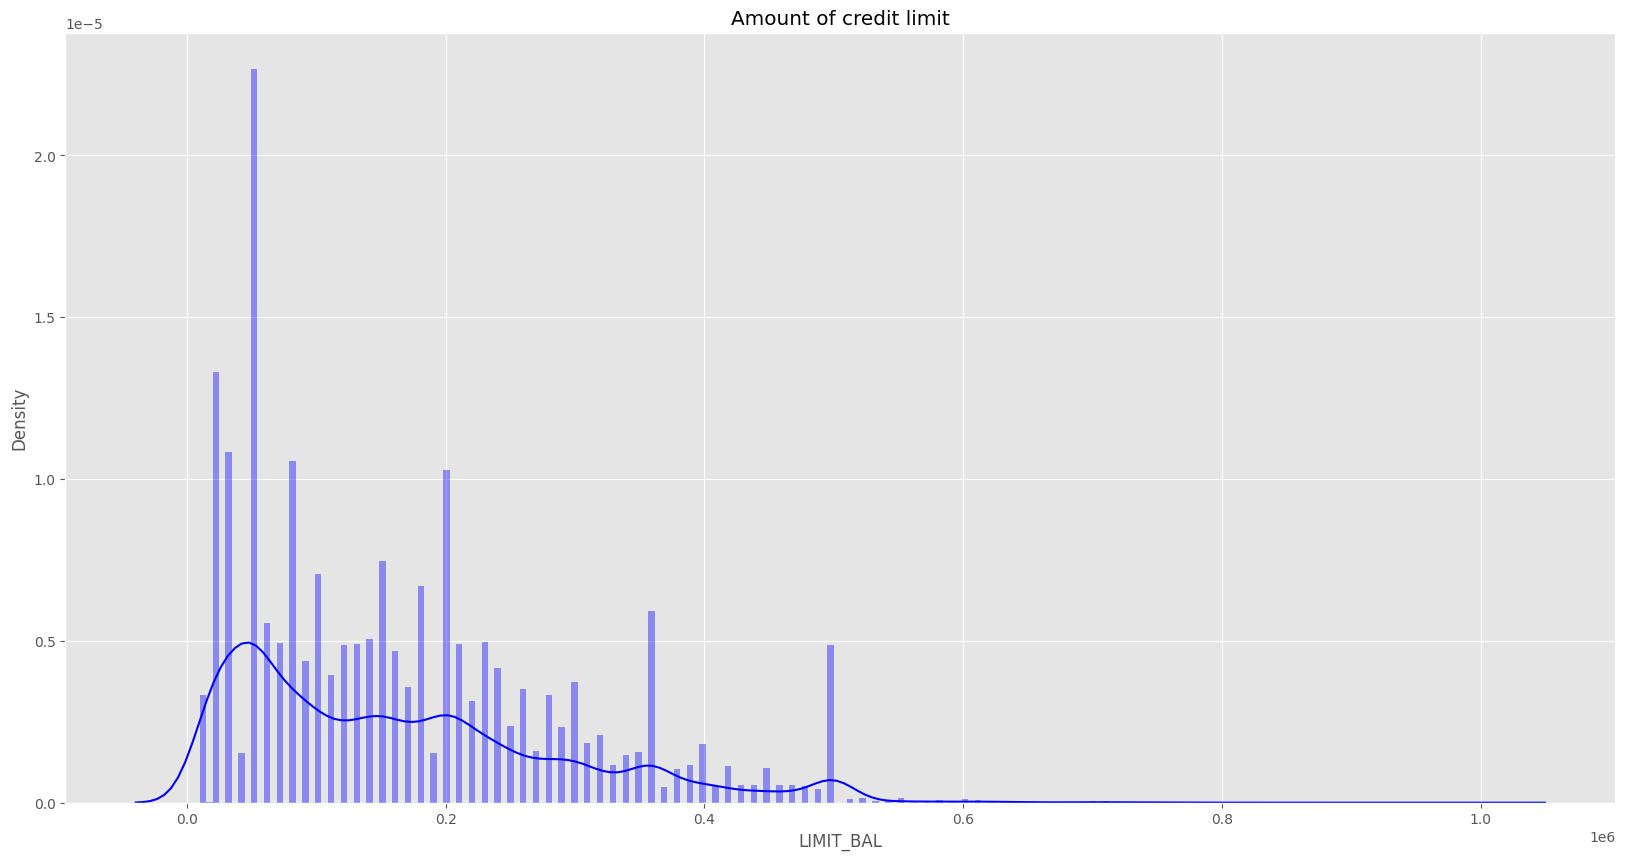

In [30]:
plt.figure(figsize = (20,10))
plt.title('Amount of credit limit')
sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')
plt.show()

In [32]:
df['LIMIT_BAL'].value_counts().head(5)

LIMIT_BAL
50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: count, dtype: int64

C:\Users\janki\AppData\Local\Temp\ipykernel_10204\413375730.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
C:\Users\janki\AppData\Local\Temp\ipykernel_10204\413375730.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0, kde = True, bi

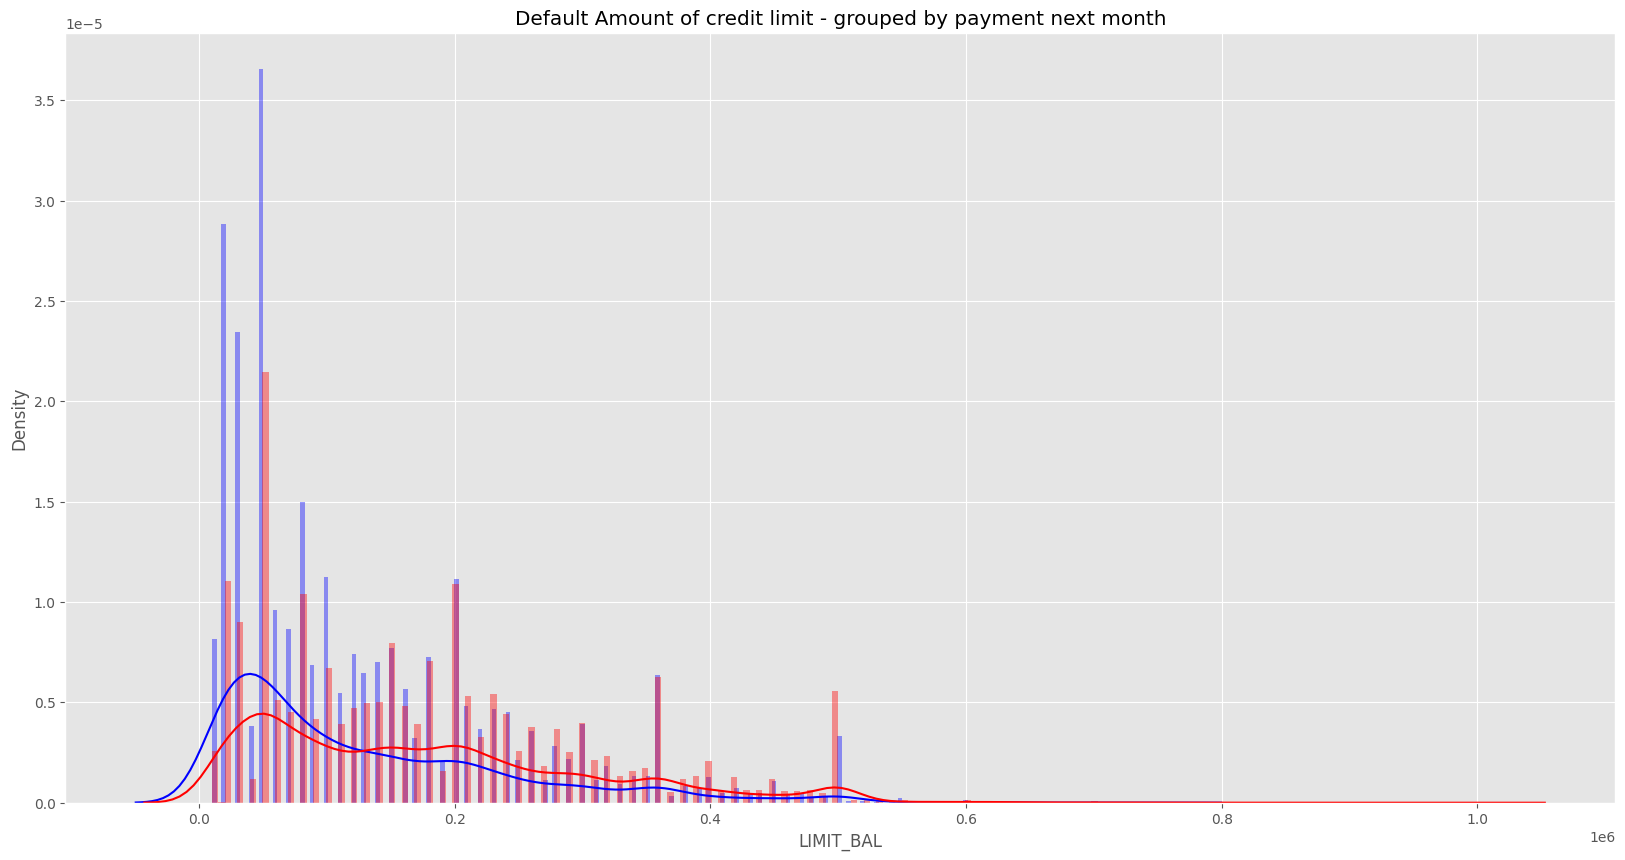

In [35]:
class_0 = df.loc[df['default.payment.next.month'] ==  0]['LIMIT_BAL']
class_1 = df.loc[df['default.payment.next.month'] ==  1]['LIMIT_BAL']

plt.figure(figsize = (20,10))
plt.title('Default Amount of credit limit - grouped by payment next month')
sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
sns.distplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()

In [36]:
df = df.drop('ID', axis = 'columns')

In [37]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19969,350000.0,2,1,2,32,-1,-1,-1,-1,-1,...,6800.0,5163.0,942.0,3252.0,7289.0,8495.0,5184.0,1.0,2.0,0


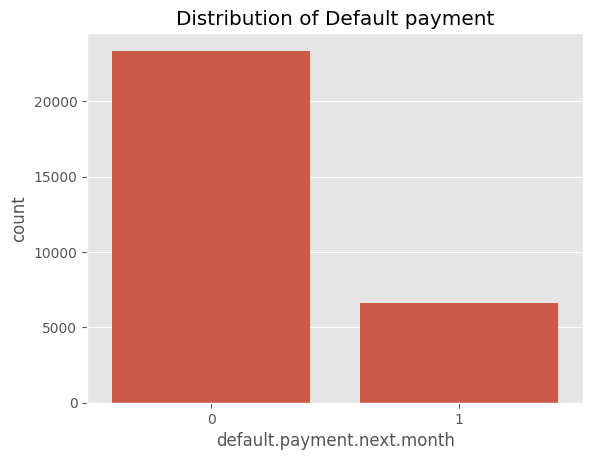

In [38]:
sns.countplot(x = 'default.payment.next.month', data = df)
plt.title('Distribution of Default payment')
plt.show()

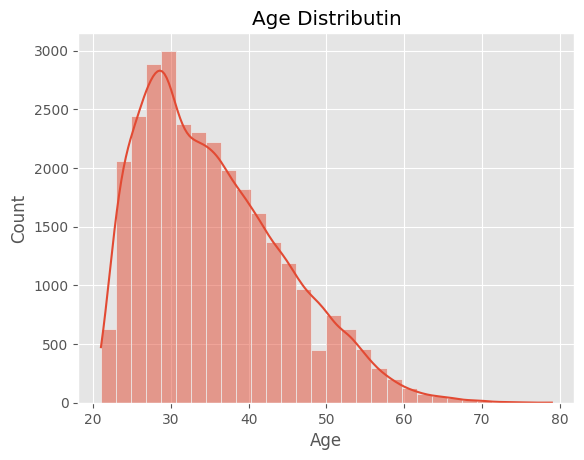

In [41]:
sns.histplot(df['AGE'], bins = 30, kde = True)
plt.title('Age Distributin')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

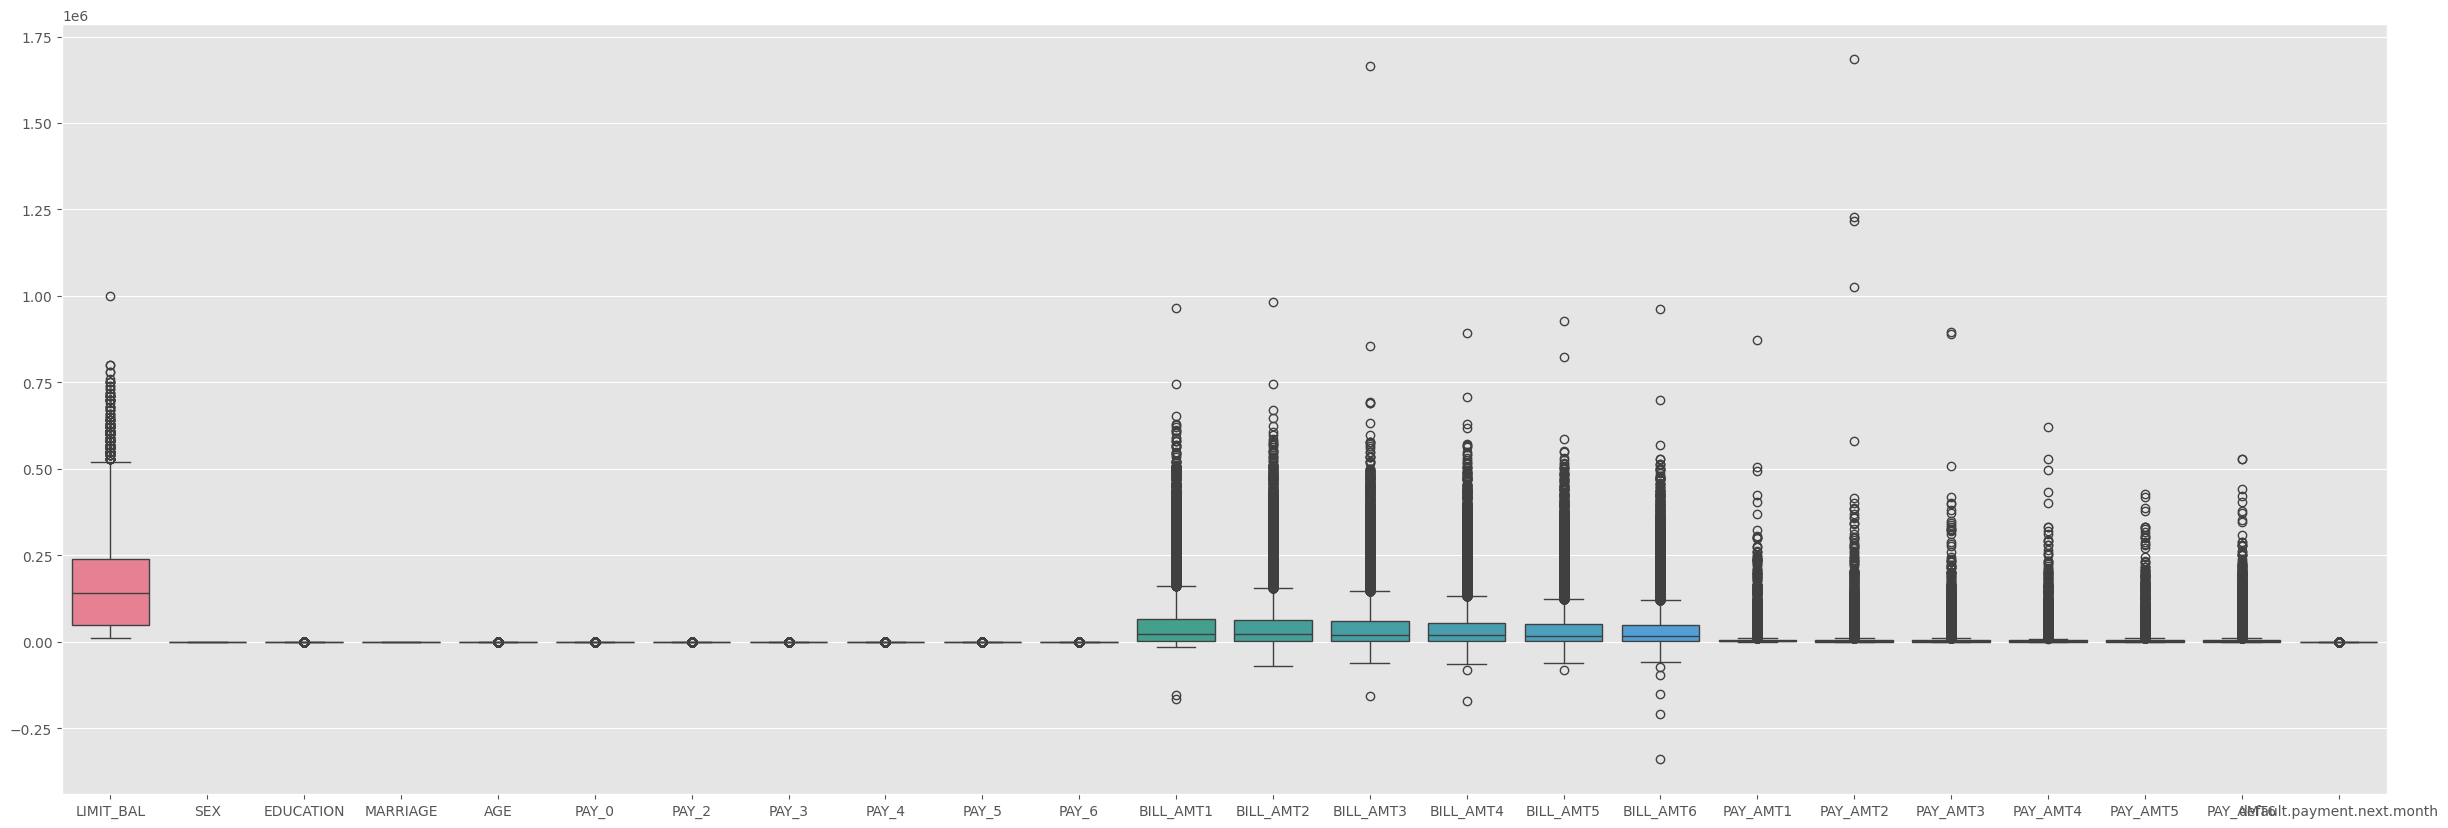

In [47]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_df)
plt.show()



In [48]:
# Separte features and target variable
X = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
df.shape

(30000, 24)

In [50]:
X_train.shape

(24000, 23)

In [51]:
y_train.shape

(24000,)

In [52]:
# Building Machine Learning Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6000,))

In [54]:
accuracy = accuracy_score(y_test, y_pred)

In [55]:
accuracy

0.81

In [56]:
report  = classification_report(y_test, y_pred)

In [57]:
report

'              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      4687\n           1       0.69      0.24      0.35      1313\n\n    accuracy                           0.81      6000\n   macro avg       0.76      0.60      0.62      6000\nweighted avg       0.79      0.81      0.77      6000\n'

In [58]:
features_importance = pd.Series(model.coef_[0], index = X.columns)
features_importance = features_importance.abs().sort_values(ascending=False)
print(features_importance)


PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [59]:
import pickle

In [60]:
pickle.dump(model, open('model.pkl', 'wb'))